In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

import sys

sys.path.append('..')

from algorithms.random_policy import RandomPolicy
from algorithms.sequence_models.decision_sequence_policy import DTPolicy
from algorithms.sequence_models.decision_transformer.decision_transformer import DecisionTransformer
from algorithms.sequence_models.evaluate import evaluate_on_env
from data.umbrella_length_dataset import UmbrellaLengthDataset
from envs.umbrella_length import get_umbrella_length_env
from data.trajectory import LimitedContextWrapper
from algorithms.sequence_models.config import TrainConfig
from algorithms.sequence_models.decision_transformer.trainer import TrainerDT
from experiment import Experiment
import gymnasium as gym
from functools import partial

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device is ", device)

device is  cuda


# Random Walk Env

In [5]:
# env = RandomWalkEnv(num_nodes=10, weight_max=10, reach_the_goal_reward=10, max_episode_length=20)
# 
# config = TrainConfig(max_eval_ep_len=20, context_len=25)
# traj_dataset = RandomWalkDataset(env, n_trajectories=500, reward_scale=20)
# 
# model = DecisionTransformer(
#     state_dim=traj_dataset.state_dim(),
#     act_dim=traj_dataset.action_dim(),
#     n_blocks=config.n_blocks,
#     h_dim=config.embed_dim,
#     context_len=config.context_len,
#     n_heads=config.n_heads,
#     drop_p=config.dropout_p,
# ).to(device)
# 
# experiment = Experiment(
#     model_name='dt',
#     model=model,
#     env_name='random_walk',
#     env=env,
#     experiment_name='starter',
#     traj_dataset=traj_dataset,
#     dataset_name=f'size={len(traj_dataset)}',
#     config=config,
#     device=device,
#     eval_policies_and_names=[
#         (DTPolicy(model=model, traj_dataset=traj_dataset, device=device, rtg=rtg, max_test_ep_len=config.max_eval_ep_len, context_length=config.context_len), 'dt_agent, r=1')
#         for rtg in range(20)
#     ]
# )

# Umbrella Length Env

In [2]:
# inner_env = gym.make('MiniGrid-DoorKey-5x5-v0')
# inner_env_human = gym.make('MiniGrid-DoorKey-5x5-v0', render_mode='human')
# env = ImgObsWrapper(inner_env)
# env_human = ImgObsWrapper(inner_env_human)
env = get_umbrella_length_env(chain_length=4)

config = TrainConfig(max_eval_ep_len=20, context_len=10, rtg_range_check=(-4, 4), rtg_main=5, max_train_iters=100)

# todo save the dataset for the experiment
traj_dataset = UmbrellaLengthDataset(env, n_trajectories=200000, reward_scale=1)

model = DecisionTransformer(
    state_dim=traj_dataset.state_dim(),
    act_dim=traj_dataset.action_dim(),
    n_blocks=config.n_blocks,
    h_dim=config.embed_dim,
    context_len=config.context_len,
    n_heads=config.n_heads,
    drop_p=config.dropout_p,
).to(device)

umbrellaLengthDTPolicy = partial(DTPolicy, model=model, traj_dataset=traj_dataset, device=device, max_test_ep_len=config.max_eval_ep_len, context_length=config.context_len)

experiment = Experiment(
    model_name='dt',
    model=model,
    env_name='bsuite/umbrella_length-v0',
    env=env,
    experiment_name='umbrella_ch_4_dt',
    traj_dataset=traj_dataset,
    dataset_name=f'size={len(traj_dataset)}',
    config=config,
    device=device,
    eval_policies_and_names=[
        (umbrellaLengthDTPolicy(rtg=rtg), f'dt,rtg={rtg}')
        for rtg in [-1.5, 1.5]
    ]
)

collecting trajectories:   0%|          | 0/200000 [00:00<?, ?it/s]

Dataset Info:
episode_max_length: 4
reward_scale: 1
return min=-4.0, max=4.0 mean=-0.000405
state_mean: [[0.500535   0.5003713  0.625      0.50017124 0.50100625 0.49994126
  0.49921125 0.50078    0.49958876 0.5002125  0.4994725  0.50079376
  0.50064    0.4987075  0.50051    0.49971    0.50114876 0.5004662
  0.50035    0.49985    0.5001875  0.499755   0.49955875]]
state_std: [[0.49999955 0.50000024 0.2795085  0.5        0.49999908 0.5
  0.5000002  0.49999967 0.49999994 0.49999997 0.5000001  0.50000006
  0.5000003  0.49999887 0.4999998  0.49999997 0.4999988  0.50000006
  0.5        0.49999997 0.49999988 0.50000006 0.49999997]]
gamma: 1
number of parameters 1126426


training started


  0%|          | 0/300 [00:00<?, ?it/s]

time elapsed: 0:00:04
num of updates: 100
loss: 0.32601
lr 0.00001
grad_norm 0.17876
time elapsed: 0:00:06
num of updates: 200
loss: 0.26241
lr 0.00002
grad_norm 0.17306
time elapsed: 0:00:08
num of updates: 300
loss: 0.25774
lr 0.00003
grad_norm 0.19032
time elapsed: 0:00:10
num of updates: 400
loss: 0.25542
lr 0.00004
grad_norm 0.19247
time elapsed: 0:00:13
num of updates: 500
loss: 0.25454
lr 0.00005
grad_norm 0.20022
time elapsed: 0:00:15
num of updates: 600
loss: 0.25331
lr 0.00006
grad_norm 0.20599
time elapsed: 0:00:17
num of updates: 700
loss: 0.25258
lr 0.00007
grad_norm 0.20565
time elapsed: 0:00:19
num of updates: 800
loss: 0.24933
lr 0.00008
grad_norm 0.16159
time elapsed: 0:00:21
num of updates: 900
loss: 0.24530
lr 0.00009
grad_norm 0.20663
time elapsed: 0:00:24
num of updates: 1000
loss: 0.24225
lr 0.00010
grad_norm 0.20198
time elapsed: 0:00:26
num of updates: 1100
loss: 0.24154
lr 0.00011
grad_norm 0.21511
time elapsed: 0:00:28
num of updates: 1200
loss: 0.23851
lr 0.0

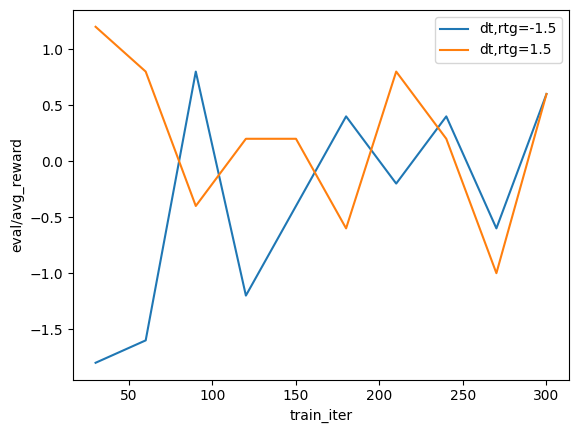

In [3]:
report = experiment.train_for(300)

<Axes: >

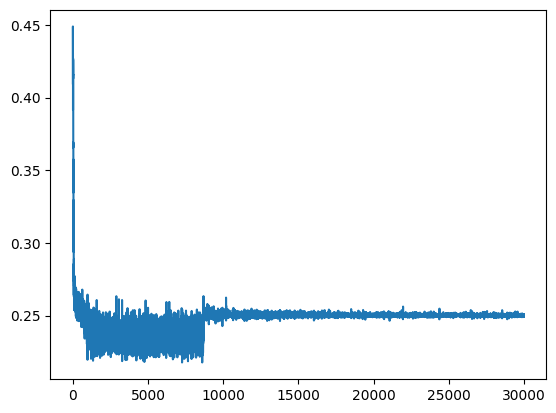

In [4]:
experiment.plot_loss(report)

### how to evaluate policy?

In [5]:
from algorithms.evaluate_policy import evaluate_policy

umbrellaLengthDTPolicy = partial(DTPolicy, model=model, traj_dataset=traj_dataset, device=device, max_test_ep_len=config.max_eval_ep_len, context_length=config.context_len)

# one way: use DTPolicy and evaluate_policy
policy = umbrellaLengthDTPolicy(rtg=1.5)
evaluate_policy(policy, env, num_eval_ep=config.num_eval_ep, max_test_ep_len=config.max_eval_ep_len)


{'eval/avg_reward': -0.8, 'eval/avg_ep_len': 4.0}

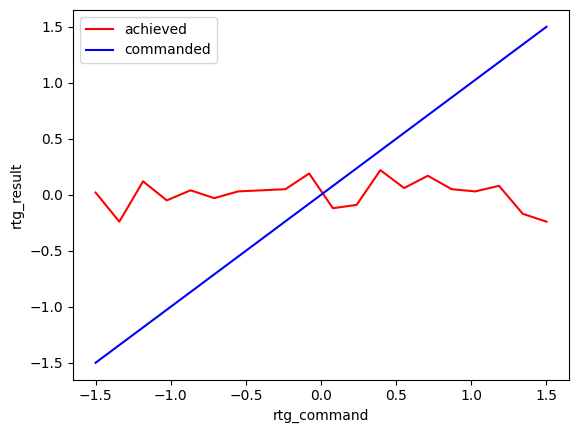

In [6]:
rtg_command = np.linspace(-1.5, 1.5, 20)

rtg_result = []

for rtg in rtg_command:
	res = evaluate_on_env(
		model=model,
		traj_dataset=traj_dataset,
		device=device,
		context_len=config.context_len,
		env=env,
		rtg_target=rtg,
		num_eval_ep=200
	)
	rtg_result.append(res['eval/avg_reward'])

plt.plot(rtg_command, rtg_result, 'r')
plt.plot(rtg_command, rtg_command, 'b')
plt.xlabel("rtg_command")
plt.ylabel("rtg_result")


plt.legend(["achieved", "commanded", "best"])

In [26]:
# or manually evaluate!

obs, _ = env.reset()
policy.reset()  # important
done = False

while not done:
    action = policy.predict(obs)
    obs, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    policy.add_to_history(obs, action, reward, done) # important
    print(obs, reward, action)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [2 5 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [5 4 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [1 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [1 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [2 5 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 0 1
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [2 5 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [5 4 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [1 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [1 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [2 5 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]


In [7]:
from bsuite.experiments import summary_analysis
# from bsuite.logging import csv_load
from bsuite.experiments.umbrella_length import analysis as umbrella_length_analysis
from bsuite import load_and_record_to_csv

from bsuite.utils import gym_wrapper

OSError: 'seaborn-poster' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)